# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

### Objective
E-news Express has requested an analysis of their new online portal vs the existing portal and desires to perform A/B testing of the two landing pages. A randomly selected sample of 50 users was obtained from both the new and existing online portals. I have been asked to examine data within the samples and provide univariate and multivariate analysis. The business also has requested answers to the following questions:

* Do the users spend more time on the new landing page than on the existing landing page?
* Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
* Does the converted status depend on the preferred language?
* Is the time spent on the new page the same for the different language users?

When performing statistical analysis for the above questions, assume a 5% significance level when determining answers.

Provide recommendations to the company based the analysis given.

### Data Dictionary
The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* user_id - Unique user ID of the person visiting the website
* group - Whether the user belongs to the first group (control) or the second group (treatment)
* landing_page - Whether the landing page is new or old
* time_spent_on_the_page - Time (in minutes) spent by the user on the landing page
* converted - Whether the user gets converted to a subscriber of the news portal or not
* language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# Import various modules needed to perform analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

## Reading the Data into a DataFrame

In [3]:
# Load the abtest.csv file
abtest = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
# Show the first five rows of the dataframe
abtest.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# Show the last five rows of the dataframe
abtest.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
# Show the number of rows and columns of the dataframe
abtest_shape = np.array(abtest.shape) 
print('There are', abtest_shape[0],'rows and', abtest_shape[1], 'columns')

There are 100 rows and 6 columns


#### Observations:
There are 100 rows and 6 columns

In [7]:
# Describe the numerical variables
abtest.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Observations:
* The average time spent on the landing pages is 5.3 minutes
* The minimum time spent on the landing pages is 0.2 minutes
* The maximum time spent on the landing pages is 10.7 minutes
* The user id information does not provide any meaningful statistical information 

In [8]:
# Describe the categorical variables
abtest.describe(include='object').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


#### Observations:
* There are 100 records in the sample dataset
* The group and landing_page columns represent essentially the same information
* Out of the 100 samples, 54 users have been converted to subscribers
* There are 3 preferred languages in the dataset

In [9]:
# List the column datatypes and check to see if there are any null values in the dataframe
abtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations:
* Of the 100 rows, there are no null values
* User_id is an integer
* Time_spent_on_the_page is a floating value
* Group, landing_page, converted, and language_preferred are of the object type

In [10]:
# Check the dataframe for any duplicate records
abtest_dup = abtest[abtest.duplicated()]
abtest_dup

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred


#### Observations:
* There are no duplicate rows in the data

In [11]:
# Determine null values within the DataFrame and sum the counts into column buckets
df_null = pd.DataFrame(abtest.isnull().sum()).reset_index()

# Print the results of the missing value analysis
# Declare report variables
issues=0
text1 = 'Column'
text2 = 'Result'

# Print report framework
print('Evaluation of missing values in DataFrame:')
print('-'*55)
print(f'{text1:<30}{text2}')

# Print results of missing value analysis by column
for i in range(len(df_null)):
    if df_null.iloc[i,1] != 0:
        print(f'{df_null.iloc[i,0]:<30}{df_null.iloc[i,1]} missing values')
        issues += df_null.iloc[i,1]
    else:
        print(f'{df_null.iloc[i,0]:<30}has no missing values')
        
# Print total number, if exists, of missing values in DataFrame        
if issues == 0:
    print('There are no missing values in the DataFrame')
else:
    print('There are', issues, 'missing values in the DataFrame')

Evaluation of missing values in DataFrame:
-------------------------------------------------------
Column                        Result
user_id                       has no missing values
group                         has no missing values
landing_page                  has no missing values
time_spent_on_the_page        has no missing values
converted                     has no missing values
language_preferred            has no missing values
There are no missing values in the DataFrame


#### Observations:
* There are no missing values in the dataset.

### Univariate Analysis

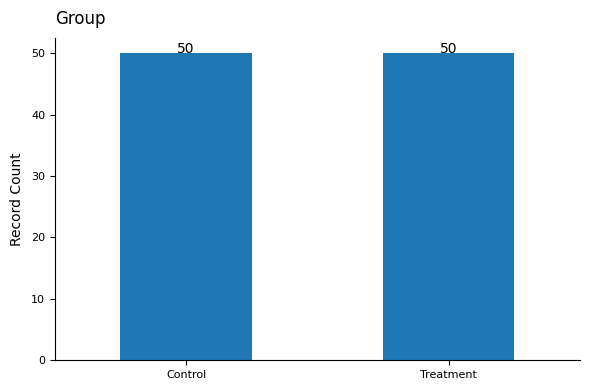

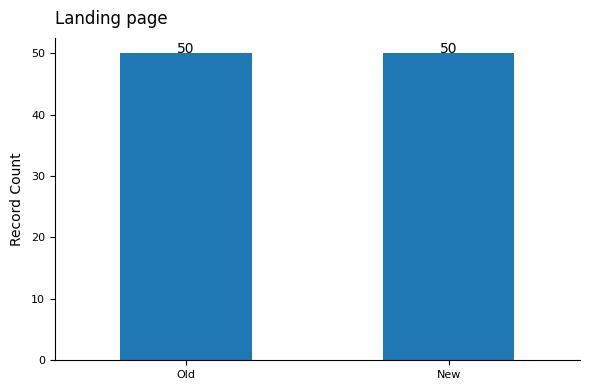

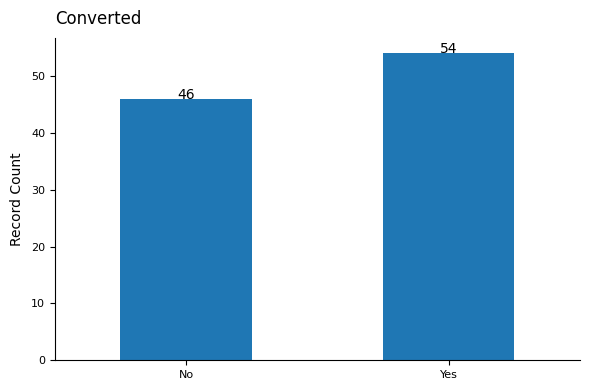

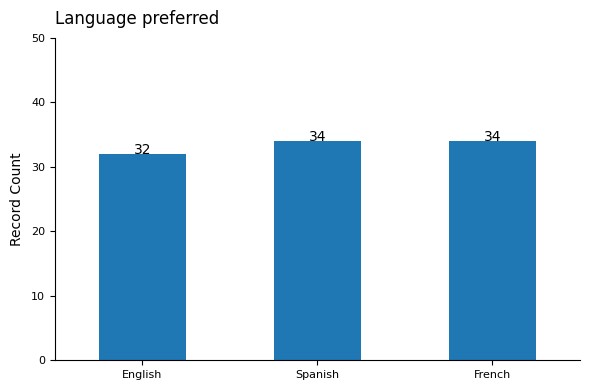

In [12]:
# Create bar charts for the group, landing_page, converted, and language_preferred categorical fields
# User id is not included

# Create a list of columns to create bar charts
categorical_attributes = ['group','landing_page','converted','language_preferred']

# For each value in the list of categories, create a bar chart
for att in categorical_attributes:
    plt.figure(figsize=(6,4))
    z = abtest[att].value_counts().sort_values(ascending=True)
    ax = abtest[att].value_counts().sort_values(ascending=True).plot.bar()
    plt.title(att.capitalize().replace('_',' '), fontsize=12, pad=10, loc='left')
    plt.ylabel('Record Count', fontsize=10, labelpad=5)
    plt.xticks(rotation=0, fontsize=8)
    plt.yticks(np.arange(0,60,10),fontsize=8)
    plt.tight_layout()
        labels = [item.get_text().capitalize() for item in ax.get_xticklabels()]
        ax.set_xticklabels(labels)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for i in range(len(z)):
        plt.text(i,z[i],z[i], horizontalalignment='center')
    plt.show()

#### Observations:
* The group and landing_page columns both have 50 records in the treatment(new) and control(old) landing pages. The values appear to represent the same information
* Customers subscribing to the business represent 54% of the sample
* The numbers of users preferring either English, Spanish, or French is evenly distributed within the sample


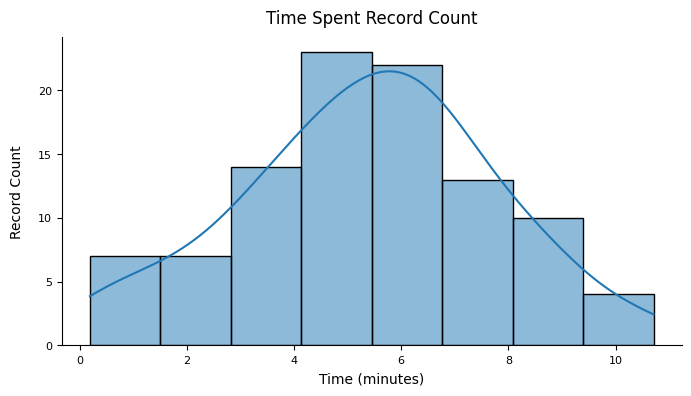

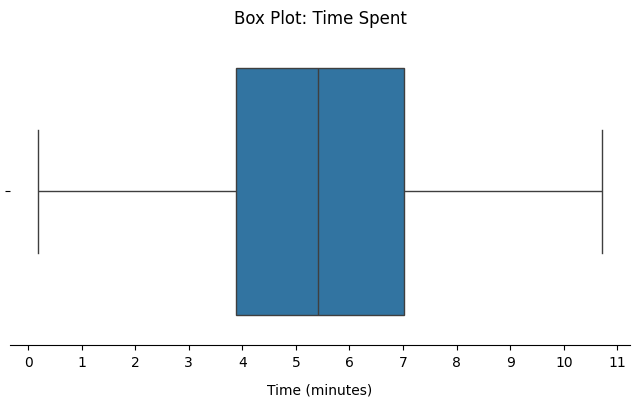

In [13]:
# Create a histogram of the column time_spent_on_the_page
plt.figure(figsize=(8,4))
plt.title('Time Spent Record Count', fontsize=12, pad=10)
plt.xlabel('Time (minutes)', fontsize=10, labelpad=5, )
plt.ylabel('Record Count', fontsize=10, labelpad=10)
plt.xticks(fontsize=8)
plt.yticks(np.arange(0,30,5),fontsize=8)
ax = sns.histplot(data = abtest, x='time_spent_on_the_page', kde=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()           

# Create a boxplot of the column time_spent_on_the_page
plt.figure(figsize=(8,4))
plt.title('Box Plot: Time Spent', fontsize=12, pad=10)
plt.xlabel('Time (minutes)', fontsize=10, labelpad=10)
plt.xticks(np.arange(0, 15, step=1), fontsize=10)
ax = sns.boxplot(data = abtest, x='time_spent_on_the_page')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()

#### Observations
* The time spent on the landing pages appears to be normally distributed
* The middle 50% of users spend between 4 and 7 on the landing page

### Bivariate Analysis

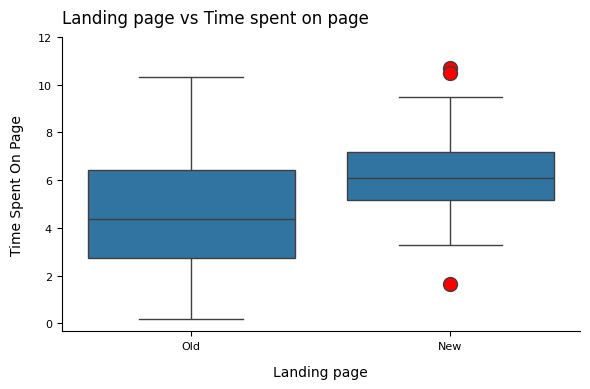

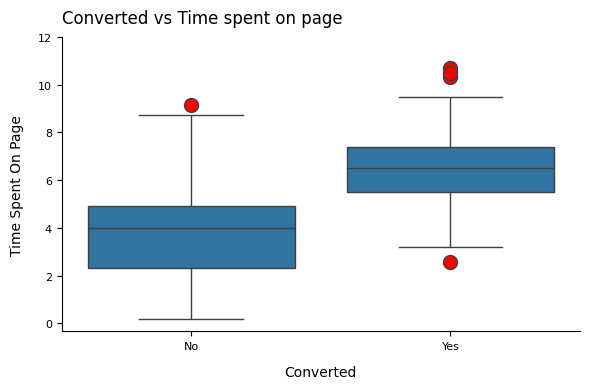

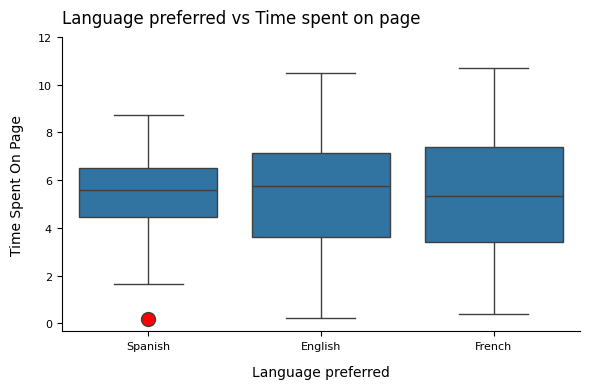

In [14]:
# Create 3 boxplots each comparing landing_page, converted, and language_preferred columns
# to the time_spent_on_the page column

# Create a list of columns to create box plots
categorical_attributes = ['landing_page','converted','language_preferred']

# For each value in the list of categories, create a bar chart
for att in categorical_attributes:
    plt.figure(figsize=(6,4))
    flierprops = dict(marker='o', markerfacecolor='Red', markersize=10)
    ax = sns.boxplot(data=abtest,x=att,y='time_spent_on_the_page', flierprops=flierprops)
    plt.title(att.capitalize().replace('_',' ')+' vs Time spent on page', fontsize=12, pad=10, loc='left')
    plt.ylabel('Time Spent On Page', fontsize=10, labelpad=10)
    plt.xlabel(att.capitalize().replace('_',' '), fontsize=10, labelpad=10)
    plt.xticks(rotation=0, fontsize=8)
    plt.yticks(np.arange(0,14,2),fontsize=8)
    plt.tight_layout()
    ax.set_xticks(ax.get_xticks()) 
    ax.set_xticklabels(item.get_text().capitalize() for item in ax.get_xticklabels())
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

#### Observations
* There is a wider dispersion of time spent on the old landing page vs the new landing page
* The old landing page had times ranging from less than one minute to about 10 minutes
* The new landing page had times ranging from 3 minutes to 9 minutes with some outliers on both sides of the distribution
* While the new landing page does show a noticeable increase on the lower end of time spent in the landing page, it does not indicate much improvement on the higher end of time spent vs the old landing page
* For subscription converted users, they spend more time overall in the landing page vs non-subscribers
* English and French users have a higher range of time spent online than Spanish users.
* All of the boxplots indicate a normal distribution of data with only a small number of outliers

In [15]:
# Drop the columns group and user_id. Group is essentially the same as landing_page. User id not needed
abtest_new = abtest.drop(['group', 'user_id'], axis=1).copy(deep=True)

# Summarize the data by time spent on page and record count
abtest_new_summary = abtest_new.groupby(by=['landing_page','converted','language_preferred']) \
                                        .agg({'time_spent_on_the_page':['sum','count']}).reset_index()

# Join the summary column name and operation into one
abtest_new_summary.columns = abtest_new_summary.columns.map(''.join)

# Rename the summary columns
abtest_new_summary.rename(columns={'time_spent_on_the_pagesum':'total_time_spent', 
                                   'time_spent_on_the_pagecount':'record_count'
                                  }, inplace=True)

# Show the first five rows of the summary
abtest_new_summary.head()

,landing_page,converted,language_preferred,total_time_spent,record_count
0,new,no,English,33.04,6
1,new,no,French,22.00,5
2,new,no,Spanish,27.96,6
3,new,yes,English,73.58,10
4,new,yes,French,83.34,12


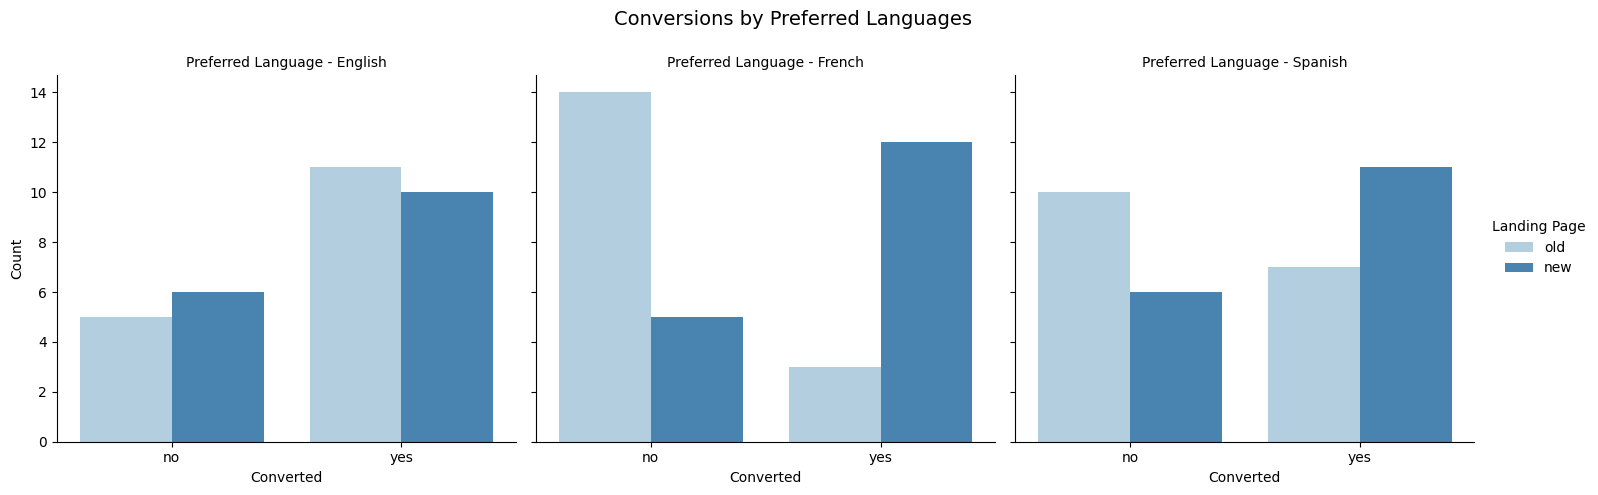

In [16]:
# Create bar chart of the preferred languages by conversion count
# Include landing page as the hue
ax = sns.catplot(data=abtest_new_summary, x='converted', y='record_count', hue='landing_page',
                 col='language_preferred', kind='bar', palette="Blues", hue_order=['old','new'])
ax.fig.suptitle('Conversions by Preferred Languages', fontsize=14)
ax.set_titles('Preferred Language - {col_name}')
ax.set_axis_labels('Converted','Count')
ax._legend.set_title('Landing Page')
plt.subplots_adjust(top=.85)
plt.show()

#### Observations:
* English users had a higher subscription conversion rate under the old landing page vs the new landing page
* French and Spanish had a higher subscription conversion rate under the new landing page vs the old landing page

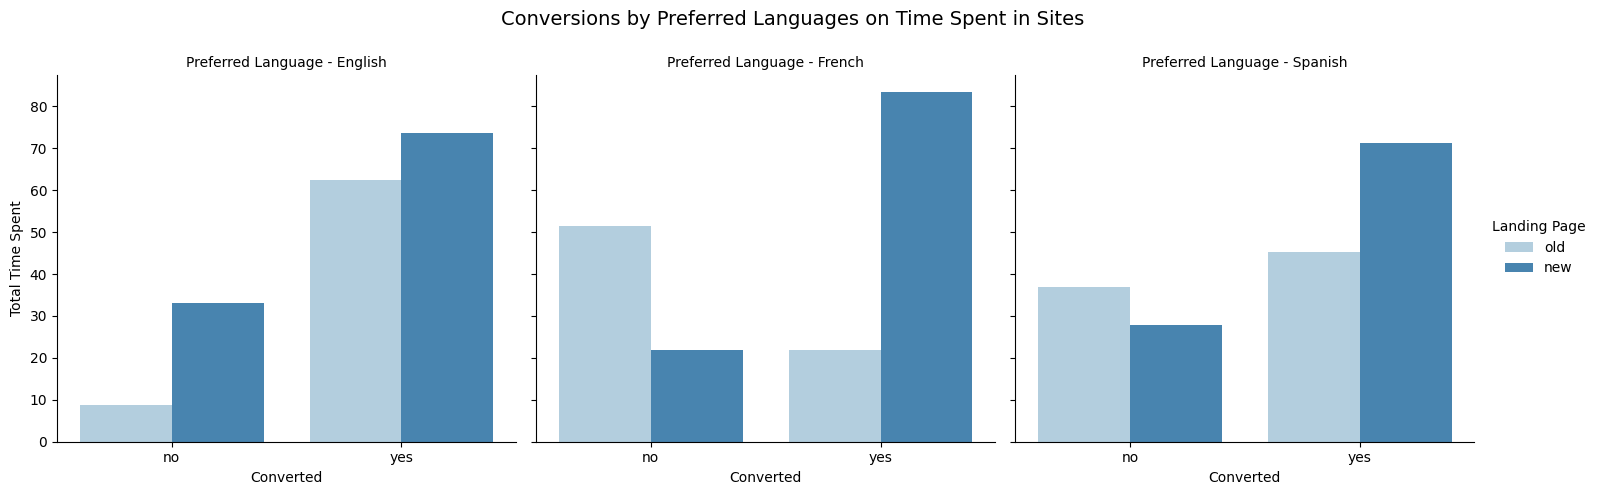

In [17]:
# Create bar chart of the preferred languages by conversion and time spent on the landing page
# Include landing page as the hue
ax = sns.catplot(data=abtest_new_summary, x='converted', y='total_time_spent', hue='landing_page',
                 col='language_preferred', kind='bar', palette="Blues", hue_order=['old','new'])
ax.fig.suptitle('Conversions by Preferred Languages on Time Spent in Sites', fontsize=14)
ax.set_titles('Preferred Language - {col_name}')
ax.set_axis_labels('Converted','Total Time Spent')
ax._legend.set_title('Landing Page')
plt.subplots_adjust(top=.85)
plt.show()

#### Observations:
* French subscription users spent 4 times the amount of time on the new landing page than the old page
* English non-subscription users spent 3 times the amount of time on the new landing page than the old page
* Spanish subscription users had about a 50% increase in time spent on the new landing page than the old page

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

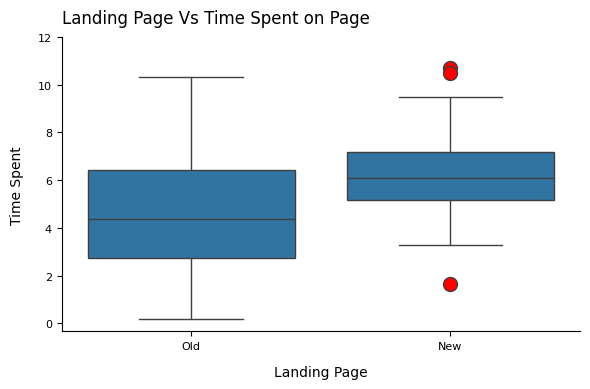

In [18]:
# Create a boxplot of the landing page version vs the time spent on a webpage
plt.figure(figsize=(6,4))
flierprops = dict(marker='o', markerfacecolor='Red', markersize=10)
ax = sns.boxplot(data=abtest, x='landing_page', y='time_spent_on_the_page', flierprops = flierprops)
plt.title('Landing Page Vs Time Spent on Page', fontsize=12, pad=10, loc='left')
plt.xlabel('Landing Page', fontsize=10, labelpad=10)
plt.ylabel('Time Spent', fontsize=10, labelpad=10)
plt.xticks(rotation=0, fontsize=8)
plt.yticks(np.arange(0,14,2),fontsize=8)
plt.tight_layout()
ax.set_xticks(ax.get_xticks()) 
ax.set_xticklabels(item.get_text().capitalize() for item in ax.get_xticklabels())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2$ be the mean time spent for the new and old landing pages 
respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$


### Step 2: Select Appropriate test

* Continuous data - The time spent on a page is measured on a continuous scale
* Normally distributed data and sample sizes > 30 - The sample sizes for both the new and old landing pages are greater than 30, so the Central Limit Theorem states that the distribution of sample means will be normal
* Independent populations - The samples are taken from two different landing pages, the 2 samples are independent
* Unequal population standard deviations - Since the sample standard deviations are different, the population standard deviations for both landing pages is assumed to be different
* Random sampling from the population - We are informed the collected samples are simple random samples 

Perform a 2 sample independent t-test for equality of means when unequal standard deviations

### Step 3: Decide the significance level

The significance level is α = 0.05

### Step 4: Collect and prepare data

In [19]:
# Load the abtest.csv data with only the landing_page and time_spent_on_the_page columns
abtest_lt = pd.read_csv('abtest.csv', usecols=['landing_page', 'time_spent_on_the_page'])

# Create a filtered dataframe of only the new landing_page
abtest_new = abtest_lt[abtest_lt['landing_page']=='new']

# Create a filtered dataframe of only the old landing_page
abtest_old = abtest_lt[abtest_lt['landing_page']=='old']

# Calculate the mean and standard deviations for the time spent within the new/old landing page dataframes
print('The mean time spent on the pages for the new landing is ' + \
      str(round(abtest_new['time_spent_on_the_page'].mean(),2)))
print('The mean time spent on the pages for the old landing is ' + \
      str(round(abtest_old['time_spent_on_the_page'].mean(),2)))
print('The standard deviation of the time spent on the pages for the new landing is ' + \
      str(round(abtest_new['time_spent_on_the_page'].std(),2)))
print('The standard deviation of the time spent on the pages for the old landing is ' + \
      str(round(abtest_old['time_spent_on_the_page'].std(),2)))

The mean time spent on the pages for the new landing is 6.22
The mean time spent on the pages for the old landing is 4.53
The standard deviation of the time spent on the pages for the new landing is 1.82
The standard deviation of the time spent on the pages for the old landing is 2.58


### Step 5: Calculate the p-value

In [20]:
# Import the ttest_ind from scipy
from scipy.stats import ttest_ind

# Calculate the t-stat and p-values
test_stat, p_value = ttest_ind(abtest_new['time_spent_on_the_page'], \
                               abtest_old['time_spent_on_the_page'],  \
                               equal_var = False, alternative = 'greater')
print('The p-value is ', str(round(p_value,6)))

The p-value is  0.000139


### Step 6: Compare the p-value with $\alpha$

In [21]:
# Determine if the hypothesis is rejected or failed to reject based on the p-value and level of significance
if p_value < 0.05:
    print('The p-value of {0} is less than level of significance of 5%, therefore we reject the null hypothesis'.format(round(p_value,5)))
else:
    print('The p-value of {0} is greater than or equal to the level of significance of 5%, therefore we fail to reject the null hypothesis'.format(round(p_value,5)))

The p-value of 0.00014 is less than level of significance of 5%, therefore we reject the null hypothesis


### Step 7:  Draw inference

As the p-value is much less than the level of significance, we reject the null hypothesis. Hence, we have enough statistical evidence to conclude that users spend more time on the new landing page than the existing landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

converted       no   yes
landing_page            
new           0.34  0.66
old           0.58  0.42


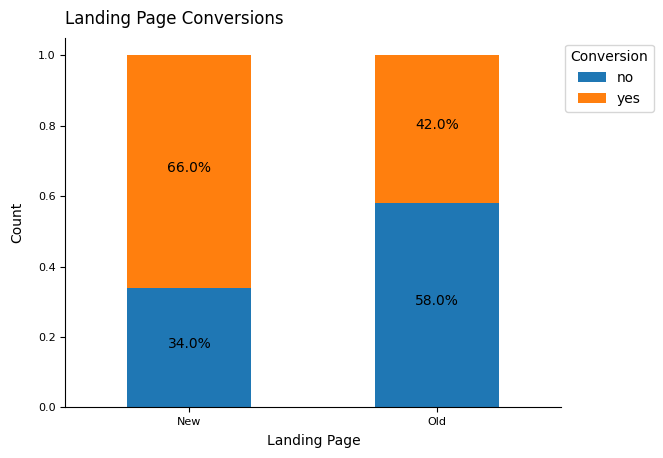

In [22]:
# Read in the abtest.csv file. use only the landing_page and converted columns
abtest_lc = pd.read_csv('abtest.csv', usecols=['landing_page', 'converted'])

# Print the count values for the landing_page and converted columns
print(pd.crosstab(abtest_lc['landing_page'],abtest_lc['converted'],normalize='index'))

# Create a stacked bar chart showing the conversions based on the landing page
plt.figsize=(6,4)
ax = pd.crosstab(abtest_lc['landing_page'],abtest_lc['converted'],normalize='index').plot(kind="bar", stacked=True)
plt.title('Landing Page Conversions', fontsize=12, pad=10, loc='left')
plt.ylabel('Count', fontsize=10, labelpad=10)
plt.xlabel('Landing Page', fontsize=10, labelpad=5)
plt.xticks(rotation=0, fontsize=8)
plt.yticks(np.arange(0,1.1, 0.2),fontsize=8)
plt.tight_layout
plt.legend(title='Conversion', loc='upper right', bbox_to_anchor=(1.2, 1))
labels = [item.get_text().capitalize() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
    for c in ax.containers:
        for v in c:
            plt.text(v.get_x() + v.get_width() / 2,
                     v.get_y() + v.get_height() / 2,
                     str(round(v.get_height()*100,2)) + '%', horizontalalignment='center')
plt.show()

### Step 1: Define the null and alternate hypotheses

Let $p_1, p_2$ be the conversion rates for users who visit the new and old landing pages
respectively.

We will test the null hypothesis

>$H_0: p_1 = p_2$

against the alternate hypothesis

>$H_a: p_1> p_2$


### Step 2: Select Appropriate test
*   Binomially distributed population - A user on a landing page is either converted or not converted.
*   Random sampling from the population - We are informed that the collected sample is a simple random sample.  
*   Binomial distribution approximates the normal distribution - The standard thing is to check whether np and n(1-p) are greater than or equal to 10. Here, n and p refer to the sample size and sample proportion respectively.
>$np_1 = 50\cdot \frac{33}{50} =33 \geq 10\\
n(1-p_1) = 50 \cdot \frac{50-33}{50} =17 \geq 10 \\
np_2 = 50\cdot \frac{21}{50} =21 \geq 10\\
n(1-p_2) = 50 \cdot \frac{50-21}{50} =29 \geq 10 $

Perform a two proportion z-test

### Step 3: Decide the significance level

The significance level is α = 0.05

### Step 4: Collect and prepare data

In [23]:
# Read in the abtest.csv file. use only the landing_page and converted columns
abtest_lc = pd.read_csv('abtest.csv', usecols=['landing_page', 'converted'])

# Get the count values for the landing page and converted columns
abtest_new = abtest_lc.value_counts()

# Get the array for defect_count. new landpage is the first value, old landpage is the second value
defect_count = [abtest_new.loc['new','yes'], abtest_new.loc['old','yes']]

# Get the array for nobs. new landpage total is the first value, old landpage total is the second value
nobs = [abtest_new.loc['new',:].sum(), abtest_new.loc['old',:].sum()]

print('The numbers of users in the new and old landing page samples are {0} and {1} respectively'. 
      format(abtest_new.loc['new',:].sum(), abtest_new.loc['old',:].sum()))

The numbers of users in the new and old landing page samples are 50 and 50 respectively


### Step 5: Calculate the p-value

In [24]:
# Import the proportions_ztest from statsmodel
from statsmodels.stats.proportion import proportions_ztest

# Calculate the t-stat and p-values
test_stat, p_value = proportions_ztest(defect_count, nobs, alternative ='larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$


In [25]:
# Determine if the hypothesis is rejected or failed to reject based on the p-value and level of significance
if p_value < 0.05:
    print('The p-value of {0} is less than level of significance of 5%, therefore we reject the null hypothesis'.format(round(p_value,5)))
else:
    print('The p-value of {0} is greater than or equal to the level of significance of 5%, therefore we fail to reject the null hypothesis'.format(round(p_value,5)))

The p-value of 0.00803 is less than level of significance of 5%, therefore we reject the null hypothesis


### Step 7:  Draw inference

As the p-value is much less than the level of significance, we reject the null hypothesis. Hence, we have enough statistical evidence to conclude that users who visit the new landing page have a higher conversion rate than those users who visit the old landing page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

language_preferred  English  French  Spanish
converted                                   
no                       11      19       16
yes                      21      15       18


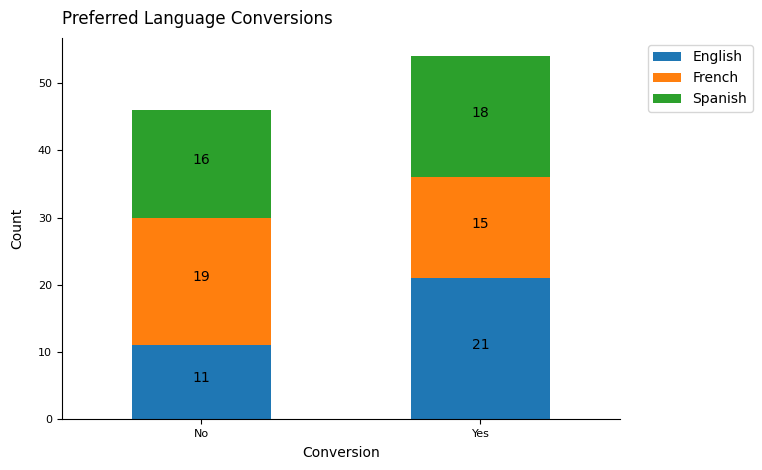

In [26]:
# Read in the abtest.csv file. use only the language_preferred and converted columns
abtest_lc = pd.read_csv('abtest.csv', usecols=['language_preferred', 'converted'])

# Print the count values for the preferred language and converted columns
print(abtest_lc.value_counts().unstack())

# Create a stacked bar chart of the conversion rates by language 
plt.figsize=(6,4)
ax = abtest_lc.value_counts().unstack().plot(kind="bar", stacked=True)
plt.title('Preferred Language Conversions', fontsize=12, pad=10, loc='left')
plt.ylabel('Count', fontsize=10, labelpad=10)
plt.xlabel('Conversion', fontsize=10, labelpad=5)
plt.xticks(rotation=0, fontsize=8)
plt.yticks(np.arange(0,60,10),fontsize=8)
plt.tight_layout()
labels = [item.get_text().capitalize() for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for c in ax.containers:
    for v in c:
        plt.text(v.get_x() + v.get_width() / 2,
                 v.get_y() + v.get_height() / 2,
                 int(v.get_height()), horizontalalignment='center')
plt.show()

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ Conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Conversion depends on preferred language.

### Step 2: Select Appropriate test

* Categorical variables - Yes both the preferred language and conversion variables are categorical
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

The test to perform is the Chi-Square test of independence

### Step 3: Decide the significance level

The significance level is α = 0.05

### Step 4: Collect and prepare data

In [27]:
# Create the contingency dataframe of conversion and languages_preferred columns
    contingency_tbl = abtest_lc.value_counts().unstack()
contingency_tbl

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [28]:
# Import the required function
from scipy.stats import chi2_contingency

# Find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_tbl)
print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [29]:
# Determine if the hypothesis is rejected or failed to reject based on the p-value and level of significance
if p_value < 0.05:
    print('The p-value of {0} is less than level of significance of 5%, therefore we reject the null hypothesis'.format(round(p_value,5)))
else:
    print('The p-value of {0} is greater than or equal to the level of significance of 5%, therefore we fail to reject the null hypothesis'.format(round(p_value,5)))

The p-value of 0.21299 is greater than or equal to the level of significance of 5%, therefore we fail to reject the null hypothesis


### Step 7:  Draw inference

As the p-value is higher than the significance level, we cannot reject the null hypothesis. We do not have sufficient statistical evidence to conclude conversion is independent of the preferred language at a 5% significance level.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [30]:
# Read in the abtest.csv file. use only the language_preferred, landing_page and time_spent_on_the_page columns
abtest_llt = pd.read_csv('abtest.csv', usecols=['language_preferred', 'landing_page','time_spent_on_the_page'])
abtest_llt_new = abtest_llt[abtest_llt['landing_page']=='new']

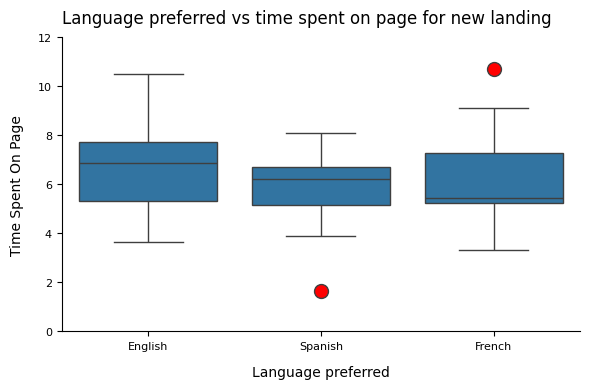

In [31]:
# Create a list of columns to create box plots
categorical_attributes = ['language_preferred']

# For each value in the list of categories, create a bar chart
for att in categorical_attributes:
    plt.figure(figsize=(6,4))
    flierprops = dict(marker='o', markerfacecolor='Red', markersize=10)
    ax = sns.boxplot(data=abtest_llt_new,x=att,y='time_spent_on_the_page', flierprops=flierprops)
    plt.title(att.capitalize().replace('_',' ')+' vs time spent on page for new landing', fontsize=12, pad=10, loc='left')
    plt.ylabel('Time Spent On Page', fontsize=10, labelpad=10)
    plt.xlabel(att.capitalize().replace('_',' '), fontsize=10, labelpad=10)
    plt.xticks(rotation=0, fontsize=8)
    plt.yticks(np.arange(0,14,2),fontsize=8)
    plt.tight_layout()
    ax.set_xticks(ax.get_xticks()) 
    ax.set_xticklabels(item.get_text().capitalize() for item in ax.get_xticklabels())
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

In [32]:
print(abtest_llt_new.groupby('language_preferred')['time_spent_on_the_page'].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on a page for the languages preferred of English, Spanish and French respectively.

$H_0: \mu_1 = \mu_2$ and $\mu_1 = \mu_3$ and $\mu_2 = \mu_3$

$H_a: \mu_1 ≠ \mu_2$ or $\mu_1 ≠ \mu_3$ or $\mu_2 ≠ \mu_3$


### Step 2: Select Appropriate test

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Time spend on a page for the new landing page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spend on a page for the new landing page does not follow a normal distribution

In [33]:
# Assumption 1: Normality
# Import the required function
from scipy import stats

# Find the p-value
w, p_value = stats.shapiro(abtest_llt_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [34]:
# Assumption 2: Homogeneity of Variance
# Import the required function
from scipy.stats import levene
statistic, p_value = levene(abtest_llt_new['time_spent_on_the_page'][abtest_llt_new['language_preferred']=="English"], 
                            abtest_llt_new['time_spent_on_the_page'][abtest_llt_new['language_preferred']=="French"], 
                            abtest_llt_new['time_spent_on_the_page'][abtest_llt_new['language_preferred']=="Spanish"])
# Find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

* The populations are normally distributed using Shapiro-Wilk's Test
* Population variances(std) are equal using the Levene's Test
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

The test to perform is the ANOVA test

### Step 3: Decide the significance level

The significance level is α = 0.05

### Step 4: Collect and prepare data

In [35]:
# Retrieve 3 individual datasets for English, French, and Spanish records including the time spent on the page
english_data = abtest_llt_new[abtest_llt_new['language_preferred']=='English']['time_spent_on_the_page']
french_data = abtest_llt_new[abtest_llt_new['language_preferred']=='French']['time_spent_on_the_page']
spanish_data = abtest_llt_new[abtest_llt_new['language_preferred']=='Spanish']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [36]:
# Import the required function
from scipy.stats import f_oneway

# Perform one-way anova test
test_stat, p_value = f_oneway(english_data,
                              french_data,
                              spanish_data)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [37]:
# Determine if the hypothesis is rejected or failed to reject based on the p-value and level of significance
if p_value < 0.05:
    print('The p-value of {0} is less than level of significance of 5%, therefore we reject the null hypothesis'.format(round(p_value,5)))
else:
    print('The p-value of {0} is greater than or equal to the level of significance of 5%, therefore we fail to reject the null hypothesis'.format(round(p_value,5)))

The p-value of 0.43204 is greater than or equal to the level of significance of 5%, therefore we fail to reject the null hypothesis


### Step 7:  Draw inference
As the p-value is higher than the significance level, we cannot reject the null hypothesis. Hence, we do not have sufficient statistical evidence to conclude the average time spent on pages by different language users is the same at a 5% significance level.

## Conclusion and Business Recommendations

* Customers subscribing to the business represent 54% of the sample
* The number of users preferring either English, Spanish, or French is evenly distributed within the sample

* While the new landing page does show a noticeable increase on the lower end of time spent in the landing page, it does not indicate much improvement on the higher end of time spent vs the old landing page

* Subscription users spend more time overall in the landing pages vs non-subscribers
* English and French users spend more time on the landing pages than the Spanish users.
* French subscription users spent 4 times the amount of time on the new landing page vs the old page
* Spanish subscription users showed approximately a 50% increase in time spent on the new landing page vs the old page
* English subscription users did not have a significantly greater time spent in the new landing page vs the old page

* French and Spanish had a higher subscription conversion rate under the new landing page vs the old landing page
* English users had a higher subscription conversion rate under the old landing page vs the new landing page

* There was enough statistical evidence to conclude that users spend more time on the new landing page than the existing landing page.
* There was enough statistical evidence to conclude that users who visit the new landing page have a higher conversion rate than those users who visit the old landing page.
* There was not sufficient statistical evidence to conclude conversion rates are independent of the preferred language
* There was not sufficient statistical evidence to conclude the average time spent on pages by different language users is the same.

### Recommendations:
* Investigate how to migrate French and Spanish users over to the new portal through geolocation methods. Wait on migrating the English users
* Obtain more samples from the English users to better determine if the new landing page is a marked improvement over the old landing page
* Survey English users to gain more understanding of why they are not as receptive to the new landing page as the French and Spanish users
* Investigate why French subscription users were spending 4 times the amount of time on the new landing page than the old page. Survey a new sample of French subscription users as to how they rate the new landing page and why. Use the survey to better promote the business in France
* Investigate ways to increase the amount of time spent on the new landing page (e.g. videos, improved headlines)
* Investigate ways to convert users into subscribers (e.g. promotions, incentives, advertising)
* Investigate ways to obtain third party advertising revenues when non-subscribers use the new portal